In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

***
# Yelp Reviews

In [2]:
# Import the raw data.
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sentiment labelled sentences/yelp_labelled.txt', sep="	", header=None)
df.columns = ["review", "posneg"]

In [3]:
df.head()

,review,posneg
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df['pos'] = (df['posneg'] == 1)
df['neg'] = (df['posneg'] == 0)

In [5]:
df['review'].str.lower();

In [6]:
#Adding keyword features

#wow, correct
pos_keywords = ['good', 'love', 'best', 'amazing', 'great', 'recommend', 'excellent']

neg_keywords = ['awful', 'bad', 'not', 'no', 'terrible', 'disappointing', 'over', 'never', 'poor']


for key in pos_keywords:
    df[str(key)] = df.review.str.contains(str(key),case=False)

In [7]:
df.head()

,review,posneg,pos,neg,good,love,best,amazing,great,recommend,excellent
0,Wow... Loved this place.,1,True,False,False,True,False,False,False,False,False
1,Crust is not good.,0,False,True,True,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,True,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,True,False,False,True,False,False,False,True,False
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,True,False,False


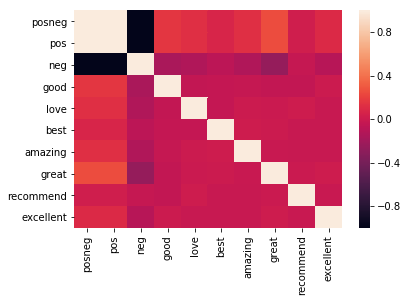

In [8]:
sns.heatmap(df.corr())

In [9]:
#Variables for model
data = df[pos_keywords]
target = df['pos']

In [10]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 332


***
# IMDB Reviews

In [11]:
# Import the raw data.
df_2 = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sentiment labelled sentences/imdb_labelled.txt', sep="	", header=None)
df_2.columns = ["review", "posneg"]

In [12]:
df_2.head()

,review,posneg
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [13]:
df_2['pos'] = (df_2['posneg'] == 1)
df_2['neg'] = (df_2['posneg'] == 0)

In [14]:
df_2['review'].str.lower();

In [15]:
#Adding keyword features

#wow, correct
pos_keywords = ['good', 'love', 'best', 'amazing', 'great', 'recommend', 'excellent']

neg_keywords = ['awful', 'bad', 'not', 'no', 'terrible', 'disappointing', 'over', 'never', 'poor']


for key in pos_keywords:
    df_2[str(key)] = df_2.review.str.contains(str(key),case=False)

In [16]:
df_2.head()

,review,posneg,pos,neg,good,love,best,amazing,great,recommend,excellent
0,"A very, very, very slow-moving, aimless movie ...",0,False,True,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,True,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,True,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,True,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,True,False,False,False,True,False,False,False,False


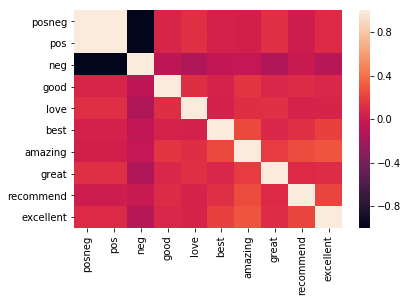

In [17]:
sns.heatmap(df_2.corr())

In [18]:
#Variables for model
data = df_2[pos_keywords]
target = df_2['pos']

In [19]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 310


***
# Overview

Using positive keywords as a classifier, the yelp dataset mislabeled 332/1000 = 33.2% of the data. 

Using positive keywords as a classifier, the imdb dataset mislabeled 310/748 = 41.4% of the data. 